# Introdução aos métodos discretos

Nome: Yago Pereira dos Anjos Santos

# Lista 4

### 1) Resolver o seguinte problema de valor de contorno:

\begin{align}
    -u''(x) + u(x) = x,\hspace{1cm} 0 \leqslant x \leqslant 1 \\
    u(0) = 1 \\
    u(1) = 2
\end{align}

In [50]:
import numpy as np
import matplotlib.pyplot as plt

a) Escreva a formulação variacional do problema de valor de contorno, apresentando os espaços para $u$ e $v$

Denotando por $I = [0, 1]$, os espaços para $u$ e $v$ são $U_{0} = \{v\,:\,\|v\|_{L^{2}(I)} < \infty, \|v'\|_{L^{2}(I)} < \infty, v(0) = 1, v(1) = 2\}$ e $V_{0} = \{v\,:\,\|v\|_{L^{2}(I)} < \infty, \|v'\|_{L^{2}(I)} < \infty, v(0) = v(1) = 0\}$, respectivamente. Multiplicando a equação diferencial por uma função teste $v \in V_{0}$ e integrando no domínio $I = [0, 1]$, temos:
\begin{align*}
    &\int\limits_{0}^{1} (-u''(x) + u(x))\,v(x)\,dx = \int\limits_{0}^{1} x\,v(x)\,dx \ \Rightarrow \
    -\int\limits_{0}^{1} u''(x)\,v(x)\,dx + \int\limits_{0}^{1} u(x)\,v(x)\,dx = \int\limits_{0}^{1} x\,v(x)\,dx \ \Rightarrow \\
    &\int\limits_{0}^{1} u'(x)\,v'(x)\,dx - u'(1)\,v(1) + u'(0)\,v(0) + \int\limits_{0}^{1} u(x)\,v(x)\,dx = \int\limits_{0}^{1} x\,v(x)\,dx. \\
    \therefore&\int\limits_{0}^{1} u'(x)\,v'(x)\,dx + \int\limits_{0}^{1} u(x)\,v(x)\,dx = \int\limits_{0}^{1} x\,v(x)\,dx \ \ \forall v \in V_{0}.
\end{align*}
Logo, fazendo $a(u, v) = \int\limits_{0}^{1} u'(x)\,v'(x)\,dx + \int\limits_{0}^{1} u(x)\,v(x)\,dx$ e $f(v) = \int\limits_{0}^{1} x\,v(x)\,dx$, obtemos a seguinte formulação variacional do problema de valor de contorno: encontrar $u \in U_{0}$ tal que $a(u, v) = f(v) \ \ \forall v \in V_{0}$.

b) Defina as funções base no elemento de referência

In [51]:
def phi_1(t):
    return (1-t)/2 if -1 <= t <= 1 else 0


def phi_2(t):
    return (1+t)/2 if -1 <= t <= 1 else 0

c) Construa a matriz de rigidez usando a quadratura de Gauss com 2 pontos.
Defina a matriz local, que será utilizada para construir a matriz global.

In [52]:
def MatrizRigidez(x):
    n = len(x)
    h = x[1] - x[0]
    # matriz global
    K = np.zeros((n,n))
    # matriz local
    Ke = np.zeros((2,2))
    # pesos e pontos da Quadratura de Gauss
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]
    
    # Derivada das funções base com diferença centrada
    def diff(phi, u, h=1e-6):
        return (phi(u + h) - phi(u - h))/(2*h)

    # Definindo a matriz local
    # Ke[0, 0] = 1/h
    Ke[0, 0] = (h/2) * (w[0]*((diff(phi_1, t[0])*(2/h))**2 + phi_1(t[0])**2) + w[1]*((diff(phi_1, t[1])*(2/h))**2 + phi_1(t[1])**2))
    # Ke[0, 1] = -1/h
    Ke[0, 1] = (h/2) * (w[0]*((diff(phi_1, t[0])*(2/h))*(diff(phi_2, t[0])*(2/h)) + phi_1(t[0])*phi_2(t[0])) + w[1]*((diff(phi_1, t[1])*(2/h))*(diff(phi_2, t[1])*(2/h)) + phi_1(t[1])*phi_2(t[1])))
    Ke[1, 0] = Ke[0, 1]
    # Ke[1, 1] = 1/h
    Ke[1, 1] = (h/2) * (w[0]*((diff(phi_2, t[0])*(2/h))**2 + phi_2(t[0])**2) + w[1]*((diff(phi_2, t[1])*(2/h))**2 + phi_2(t[1])**2))
    
    # Construindo a matriz global
    for i in range(n-1):
        K[i, i] += Ke[0, 0]
        K[i, i+1] = Ke[0, 1]
        K[i+1, i] = Ke[1, 0]
        K[i+1, i+1] += Ke[1, 1]

    return K

d) Construa o vetor de carga usando a quadratura de Gauss com 2 pontos.
Defina o vetor local, que será utilizado para construir vetor global.

In [53]:
def VetorCarga(x, f):
    n = len(x)
    h = x[1] - x[0]
    b = np.zeros(n)
    be = np.zeros(2)
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]

    for i in range(n - 1):
        # Mapeia os pontos de Gauss para o domínio físico [x_i, x_{i+1}]
        x_mapped_t0 = (h/2) * t[0] + (x[i+1] + x[i])/2
        x_mapped_t1 = (h/2) * t[1] + (x[i+1] + x[i])/2
        
        # Definindo o vetor local
        be[0] = (h/2) * (w[0]*f(x_mapped_t0)*phi_1(t[0]) + w[1]*f(x_mapped_t1)*phi_1(t[1]))
        be[1] = (h/2) * (w[0]*f(x_mapped_t0)*phi_2(t[0]) + w[1]*f(x_mapped_t1)*phi_2(t[1]))
        
        # Construindo o vetor global
        b[i] += be[0]
        b[i+1] += be[1]

    return b

e) Construa a função modifica a matriz de rigidez para aplicar as condições de contorno de Dirichlet.

In [54]:
def CondicaoContorno(A, b, ua, ub, h):
    n = len(b)
    A[0, 0], A[0, 1], A[1, 0] = 1, 0, 0
    A[n-1, n-1], A[n-1, n-2], A[n-2, n-1] = A[0, 0], A[0, 1], A[1, 0]
    
    b[0], b[n-1] = ua, ub
    b[1] += ua/h
    b[n-2] += ub/h

Função de que executa as etapas do MEF usando as funções anteriores, onde n é o número de nós da malha.

In [55]:
def MEF(n):
    # discretizacao de I=[0,1]
    x = np.linspace(0,1,n)
    f = lambda x: x

    # monta sistema
    A = MatrizRigidez(x)
    b = VetorCarga(x,f)

    print('Sistema sem condições de contorno')
    print(A)
    print(b)

    h = x[1] - x[0]
    # aplica condicoes de contorno
    ua, ub = 1.0, 2.0
    CondicaoContorno(A,b,ua,ub,h)

    print('Após condição de contorno')
    print(A)
    print(b)

    # calcula solucao
    uh = np.linalg.solve(A,b)

    print('Solução u')
    print(uh)

    return x, uh

e) Plote o gráfico da aproximação para 5, 9, 17, 33 e 65 nós.
Compare com a solução exata do problema, dada por $u(x) = \frac{e \ x \ + \ x \ + \ e^{1 - x} \ + \ e^x}{1 \ + \ e}$

Sistema sem condições de contorno
[[ 4.08333333 -3.95833333  0.          0.          0.        ]
 [-3.95833333  8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -3.95833333  8.16666667 -3.95833333]
 [ 0.          0.          0.         -3.95833333  4.08333333]]
[0.01041667 0.0625     0.125      0.1875     0.11458333]
Após condição de contorno
[[ 1.          0.          0.          0.          0.        ]
 [ 0.          8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -3.95833333  8.16666667  0.        ]
 [ 0.          0.          0.          0.          1.        ]]
[1.     4.0625 0.125  8.1875 2.    ]
Solução u
[1.         1.17615368 1.40027497 1.68125572 2.        ]


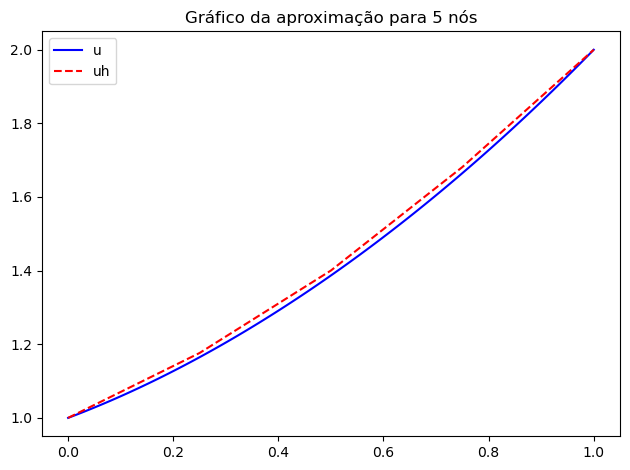

Sistema sem condições de contorno
[[ 8.04166667 -7.97916667  0.          0.          0.          0.
   0.          0.          0.        ]
 [-7.97916667 16.08333334 -7.97916667  0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -7.97916667 16.08333334 -7.97916667  0.          0.
   0.          0.          0.        ]
 [ 0.          0.         -7.97916667 16.08333334 -7.97916667  0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -7.97916667 16.08333334 -7.97916667
   0.          0.          0.        ]
 [ 0.          0.          0.          0.         -7.97916667 16.08333334
  -7.97916667  0.          0.        ]
 [ 0.          0.          0.          0.          0.         -7.97916667
  16.08333334 -7.97916667  0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -7.97916667 16.08333334 -7.97916667]
 [ 0.          0.          0.          0.          0.          0.
   0.         -7.97916667  8.0416666

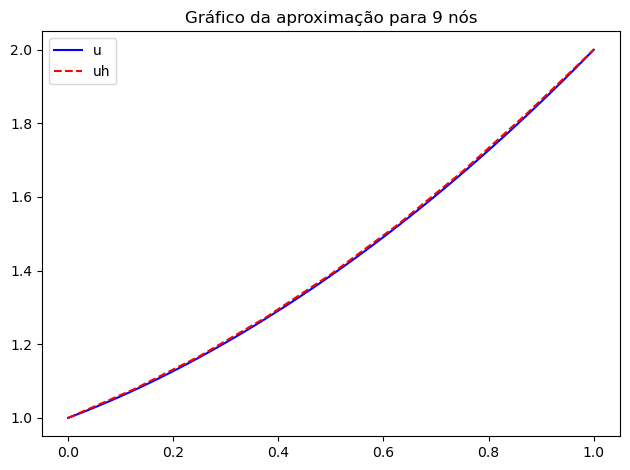

Sistema sem condições de contorno
[[ 16.02083334 -15.98958334   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [-15.98958334  32.04166667 -15.98958334   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.         -15.98958334  32.04166667 -15.98958334   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.         -15.98958334  32.04166667 -15.98958334
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.         -15.98958334  32.04166667
  -15.98958334   0.           0.           0.           0.
    0.  

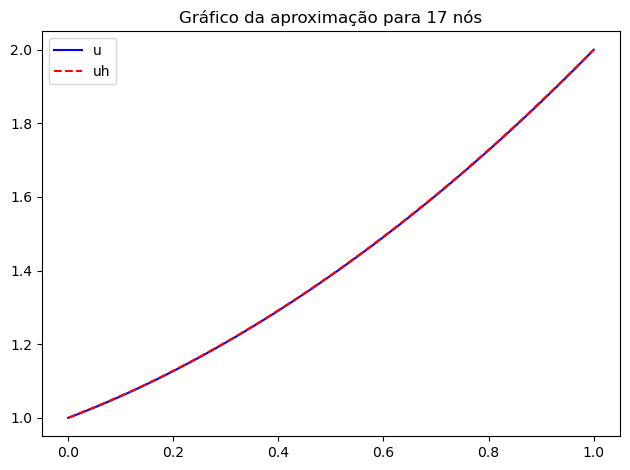

Sistema sem condições de contorno
[[ 32.01041667 -31.99479167   0.         ...   0.           0.
    0.        ]
 [-31.99479167  64.02083334 -31.99479167 ...   0.           0.
    0.        ]
 [  0.         -31.99479167  64.02083334 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  64.02083334 -31.99479167
    0.        ]
 [  0.           0.           0.         ... -31.99479167  64.02083334
  -31.99479167]
 [  0.           0.           0.         ...   0.         -31.99479167
   32.01041667]]
[0.00016276 0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906 0.00976562 0.01074219
 0.01171875 0.01269531 0.01367188 0.01464844 0.015625   0.01660156
 0.01757812 0.01855469 0.01953125 0.02050781 0.02148438 0.02246094
 0.0234375  0.02441406 0.02539062 0.02636719 0.02734375 0.02832031
 0.02929688 0.03027344 0.01546224]
Após condição de contorno
[[  1.           0.           0.         ...   0.           0.
   

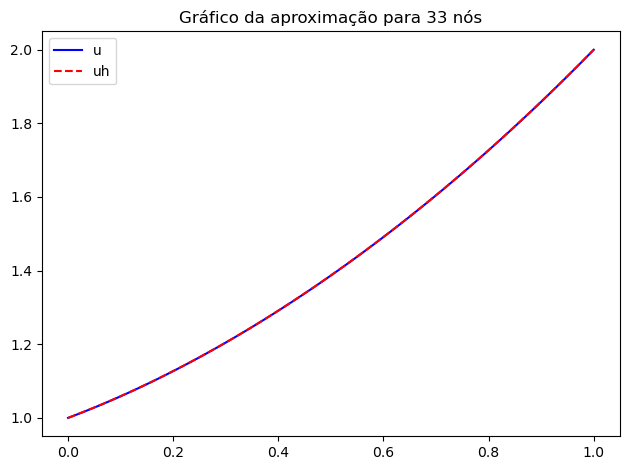

Sistema sem condições de contorno
[[ 64.00520834 -63.99739584   0.         ...   0.           0.
    0.        ]
 [-63.99739584 128.01041669 -63.99739584 ...   0.           0.
    0.        ]
 [  0.         -63.99739584 128.01041669 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 128.01041669 -63.99739584
    0.        ]
 [  0.           0.           0.         ... -63.99739584 128.01041669
  -63.99739584]
 [  0.           0.           0.         ...   0.         -63.99739584
   64.00520834]]
[4.06901042e-05 2.44140625e-04 4.88281250e-04 7.32421875e-04
 9.76562500e-04 1.22070312e-03 1.46484375e-03 1.70898438e-03
 1.95312500e-03 2.19726562e-03 2.44140625e-03 2.68554688e-03
 2.92968750e-03 3.17382812e-03 3.41796875e-03 3.66210938e-03
 3.90625000e-03 4.15039062e-03 4.39453125e-03 4.63867188e-03
 4.88281250e-03 5.12695312e-03 5.37109375e-03 5.61523438e-03
 5.85937500e-03 6.10351562e-03 6.34765625e-03 6.59179688e-03
 6.83593750e-03 7.08007812e-03 7.32

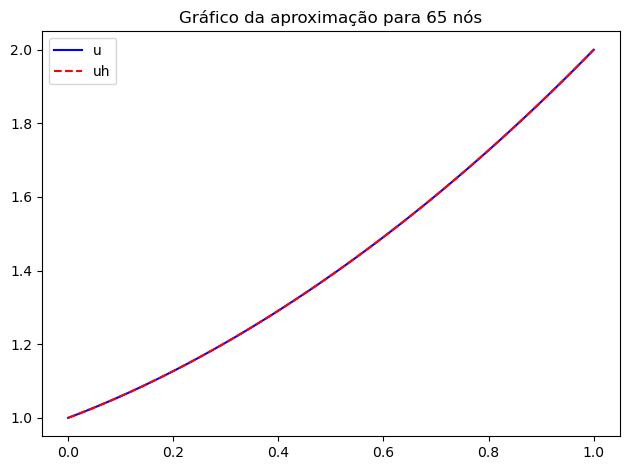

In [56]:
nos = np.array([5, 9, 17, 33, 65])

for no in nos:
    x, uh = MEF(no)
    xx = np.linspace(0, 1, 100)

    plt.plot(xx, (np.e*xx + xx + np.exp(1 - xx) + np.exp(xx))/(1 + np.e), ls='-', label='u', c='blue')
    plt.plot(x, uh, ls='--', label='uh', c='red')
    plt.legend()
    plt.title(f'Gráfico da aproximação para {no} nós')
    plt.tight_layout()
    plt.show()
